In [ ]:
# !git clone https://github.com/AustinHouston/pystemsim.git

# this gets you the cif file and pystemsim

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

import secrets
from ase.io import read
from ase.visualize import view
import abtem
from abtem.atoms import orthogonalize_cell
import pyTEMlib.probe_tools as pt

sys.path.append('/Users/austin/Documents/GitHub/pystemsim/pystemsim')
import data_generator as dg


You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled


In [7]:
# Scattering potential
xtal = read('./crystal_files/WS2.cif')
xtal, transform = orthogonalize_cell(xtal, allow_transform=True, return_transform=True)
xtal = xtal * (30, 20, 1)
positions = xtal.get_positions()[:, :2]
pixel_size = 0.106 # angstrom/pixel
fov = 96 # angstroms
frame = (0,fov,0,fov) # limits of the image in angstroms
potential = dg.create_pseudo_potential(xtal, pixel_size, sigma=1, bounds=frame, atom_frame=11)

# Probe
ab = pt.get_target_aberrations("Spectra300", 60000)
ab['acceleration_voltage'] = 60e3 # eV
ab['FOV'] = fov /12 # Angstroms
ab['convergence_angle'] = 30 # mrad
ab['wavelength'] = pt.get_wavelength(ab['acceleration_voltage'])
ab['C10'] = 1
ab['C23a'] = 0
ab['C23b'] = 0
pt.print_aberrations(ab)

In [ ]:
# the annoying cell output comes from pyTEMlib.probe_tools get_probe() function

0.03


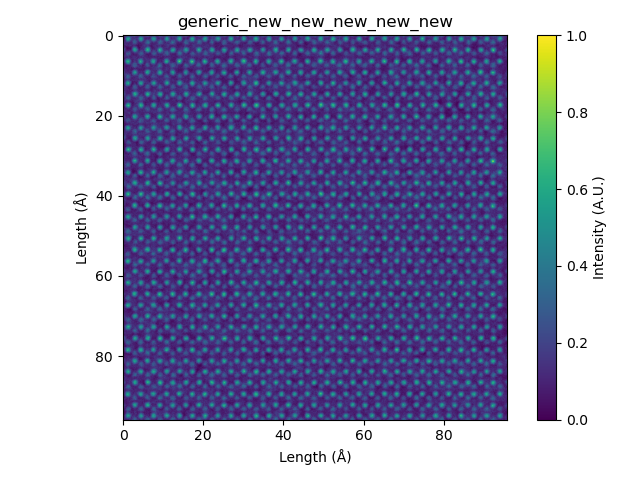

In [79]:
# change ab here
ab['C10'] = 0 # defocus
ab['C12a'] = 0 # twofold astigmatism (a)
ab['C12b'] = 0 # twofold astigmatism (b)
probe = dg.get_probe(ab, potential)
image = dg.convolve_kernel(potential, probe)
noisy_image = dg.lowfreq_noise(image, noise_level=0.5, freq_scale=.04)
sim_im = dg.poisson_noise(noisy_image, counts=1e7)

view = sim_im.plot()

In [80]:
def contrast_rms(im):
    return np.std(im) / np.mean(im)


In [81]:
contrast_rms(np.array(sim_im))

0.6904927127628708

0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


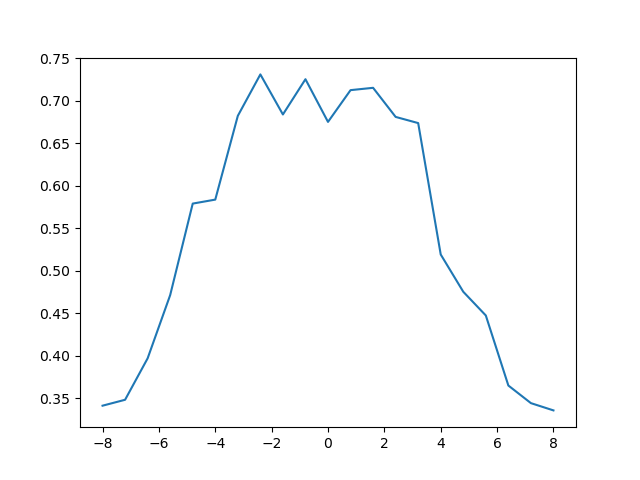

In [83]:
param_range = 8
params = np.linspace(-param_range, param_range, 21)

rms_contrasts = []
images = []
for defocus in params:
    ab['C10'] = defocus
    probe = dg.get_probe(ab, potential)
    image = dg.convolve_kernel(potential, probe)
    noisy_image = dg.lowfreq_noise(image, noise_level=0.5, freq_scale=.04)
    sim_im = dg.poisson_noise(noisy_image, counts=1e7)
    rms_contrasts.append(contrast_rms(np.array(sim_im)))
    images.append(sim_im)
ab['C10'] = 0
plt.figure()
plt.plot(params, rms_contrasts)

0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


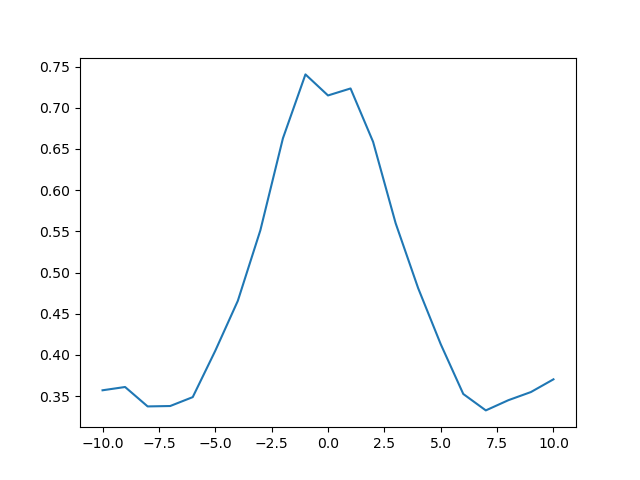

In [86]:
param_range = 10
params = np.linspace(-param_range, param_range, 21)

rms_contrasts = []
images = []
for defocus in params:
    ab['C12a'] = defocus
    probe = dg.get_probe(ab, potential)
    image = dg.convolve_kernel(potential, probe)
    noisy_image = dg.lowfreq_noise(image, noise_level=0.5, freq_scale=.04)
    sim_im = dg.poisson_noise(noisy_image, counts=1e7)
    rms_contrasts.append(contrast_rms(np.array(sim_im)))
    images.append(sim_im)
ab['C12a'] = 0
plt.figure()
plt.plot(params, rms_contrasts)

0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


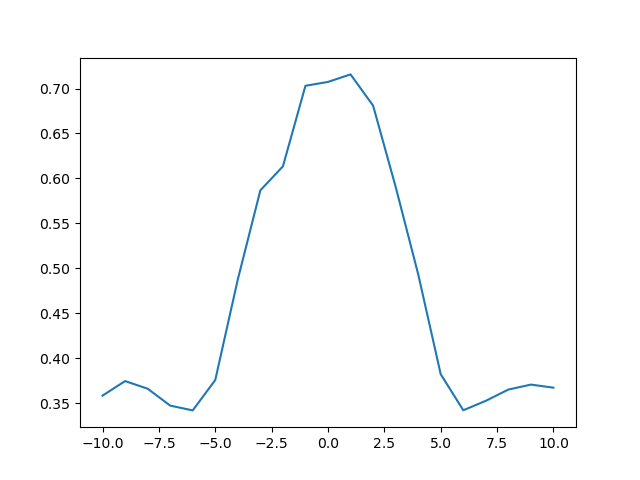

In [87]:
param_range = 10
params = np.linspace(-param_range, param_range, 21)

rms_contrasts = []
images = []
for defocus in params:
    ab['C12b'] = defocus
    probe = dg.get_probe(ab, potential)
    image = dg.convolve_kernel(potential, probe)
    noisy_image = dg.lowfreq_noise(image, noise_level=0.5, freq_scale=.04)
    sim_im = dg.poisson_noise(noisy_image, counts=1e7)
    rms_contrasts.append(contrast_rms(np.array(sim_im)))
    images.append(sim_im)
ab['C12b'] = 0
plt.figure()
plt.plot(params, rms_contrasts)